In [2]:
!pip install pandas

In [3]:
!pip install requests

In [72]:
!pip install yfinance

In [65]:
!pip install finance-datareader
!pip install -U finance-datareader

  Obtaining dependency information for finance-datareader from https://files.pythonhosted.org/packages/98/c7/9d31d78af9b0f06bb13e2686cfcefe6d5219b40d69b75375184f5af26257/finance_datareader-0.9.62-py3-none-any.whl.metadata


In [2]:
from pykrx import stock

In [77]:
import pandas as pd
import requests


buy_code = []

#KOSPI 코드 불러오기
pdf = stock.get_index_portfolio_deposit_file("1028")

for code in pdf :
    growth_counts = 0
    debt_counts = 0
    per_counts = 0
    roe_counts = 0
    
    URL = f"https://finance.naver.com/item/main.naver?code={code}"
    r = requests.get(URL)
    df = pd.read_html(r.text)[3]
    df.set_index(df.columns[0],inplace=True)
    df.index.rename('날짜', inplace=True)
    if df.columns.nlevels > 1:
        df.columns = df.columns.droplevel(2)
    annual_date = pd.DataFrame(df).xs('최근 연간 실적',axis=1)
    trans_df = annual_date.transpose()
    df_sample = trans_df.loc[:,['매출액', 'PER(배)','ROE(지배주주)','부채비율']]
    
    if '2020.12' in df_sample.index and '2022.12' in df_sample.index:
        growth_rate = (float(df_sample.loc['2022.12', '매출액']) - float(df_sample.loc['2020.12', '매출액']))/float(df_sample.loc['2022.12', '매출액'])
    else:
        growth_rate = 0
        
    if(growth_rate > 0.2) :
        growth_counts += 2
    elif(growth_rate > 0): 
        growth_counts += 1
    else:
        growth_counts += 0
    
    if '2022.12' in df_sample.index:
        debt_rate = float(df_sample.loc['2022.12', '부채비율'])
        if(debt_rate > 50) :
            debt_counts += 0
        elif(debt_rate > 30): 
            debt_counts += 1
        else:
            debt_counts += 2
    else:
        debt_rate = 100
    
    if '2022.12' in df_sample.index:
        per_rate = float(df_sample.loc['2022.12', 'PER(배)'])
        if(per_rate > 30) :
            per_counts += 0
        elif(per_rate > 15): 
            per_counts += 1
        else:
            per_counts += 2
    else:
        per_rate = 100
    
    if '2022.12' in df_sample.index:
        roe_rate = float(df_sample.loc['2022.12', 'ROE(지배주주)'])
        if(roe_rate > 15) :
            roe_counts +=2
        elif(roe_rate > 7): 
            roe_counts += 1
        else:
            roe_counts += 0
    else: 
        roe_rate = 0
    
    counts = growth_counts + debt_counts + per_counts + roe_counts
    
    if(counts > 7):
        buy_code.append(code)
        
print(buy_code)

C:\Users\kjs76\AppData\Local\Temp\ipykernel_27404\1738126589.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(r.text)[3]
C:\Users\kjs76\AppData\Local\Temp\ipykernel_27404\1738126589.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(r.text)[3]
C:\Users\kjs76\AppData\Local\Temp\ipykernel_27404\1738126589.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(r.text)[3]
C:\Users\kjs76\AppData\Local\Temp\ipykernel_27404\1738126589.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal

['005930', '011200', '271560', '000990', '137310']


C:\Users\kjs76\AppData\Local\Temp\ipykernel_27404\1738126589.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(r.text)[3]


In [53]:
df_sample

날짜,매출액,PER(배),ROE(지배주주),부채비율
2020.12,208.0,29.14,2.49,6.97
2021.12,274.0,15.62,6.51,10.55
2022.12,201.0,14.04,4.38,6.92
2023.12(E),NaN,NaN,NaN,NaN


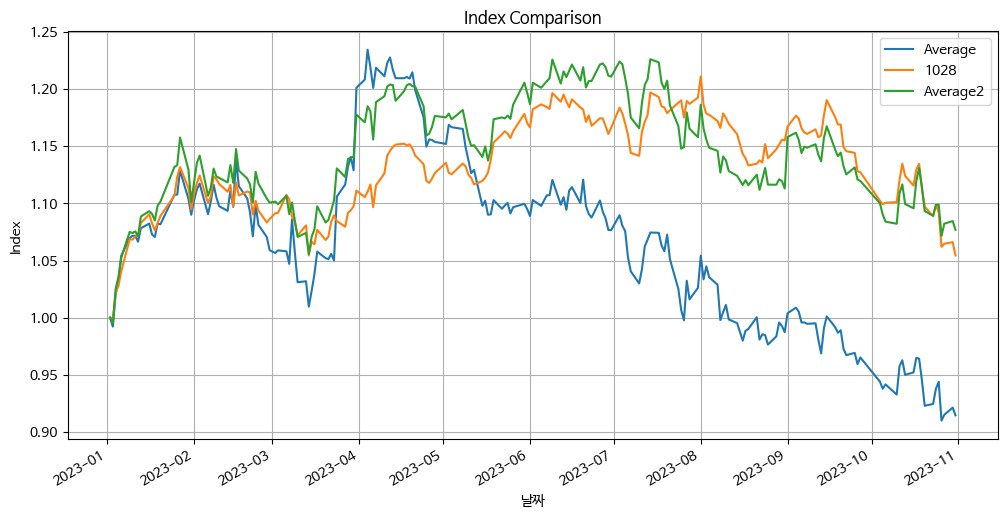

In [122]:
import matplotlib.pyplot as plt

# 종목 코드
stocks = ['005930', '011200', '271560', '000990', '137310']

kospi200 = '1028'

df = pd.DataFrame()
df_005930 = pd.DataFrame()
df_011200 = pd.DataFrame()
df_271560 = pd.DataFrame()
df_000990 = pd.DataFrame()
df_137310 = pd.DataFrame()

# 각 종목의 주가 데이터 가져오기
for stock_code in stocks:
    temp = stock.get_market_ohlcv_by_date("20230101", "20231031", stock_code)
    temp = temp['종가'].pct_change() + 1  # 변동률 계산
    temp.iloc[0] = 1  # 첫날 변동률을 1로 설정
    df[stock_code] = temp.cumprod()  # 누적 곱으로 지수화

df_temp = stock.get_market_ohlcv_by_date("20230101", "20231031", '005930')
df_temp = (df_temp['종가'].pct_change() + 1)
df_temp.iloc[0] = 1
df_005930['005930']= df_temp.cumprod()*0.6

df_temp1 = stock.get_market_ohlcv_by_date("20230101", "20231031", '011200')
df_temp1 = (df_temp1['종가'].pct_change() + 1)
df_temp1.iloc[0] = 1
df_011200['011200']= df_temp1.cumprod()*0.2

df_temp2 = stock.get_market_ohlcv_by_date("20230101", "20231031", '271560')
df_temp2 = (df_temp2['종가'].pct_change() + 1)
df_temp2.iloc[0] = 1
df_271560['271560']= df_temp2.cumprod()*0.1

df_temp3 = stock.get_market_ohlcv_by_date("20230101", "20231031", '000990')
df_temp3 = (df_temp3['종가'].pct_change() + 1)
df_temp3.iloc[0] = 1
df_000990['000990']= df_temp3.cumprod()*0.075

df_temp4 = stock.get_market_ohlcv_by_date("20230101", "20231031", '137310')
df_temp4 = (df_temp4['종가'].pct_change() + 1)
df_temp4.iloc[0] = 1
df_137310['137310']= df_temp4.cumprod()*0.025

df_sum = df_005930['005930'] + df_011200['011200'] + df_271560['271560'] + df_000990['000990'] + df_137310['137310']
df_sum.iloc[0] = 1

df_merged = pd.concat([df, df_sum], axis=1)

# 평균 주가 지수 계산
df['Average'] = df.mean(axis=1)
df['Average2'] = df_sum  # axis 파라미터 제거

# KOSPI 200의 주가 데이터 가져오기
df_kospi200 = stock.get_index_ohlcv_by_date("20230101", "20231031", kospi200)
df_kospi200 = df_kospi200['종가'].pct_change() + 1  # 변동률 계산
df_kospi200.iloc[0] = 1  # 첫날 변동률을 1로 설정
df[kospi200] = df_kospi200.cumprod()  # 누적 곱으로 지수화

# 데이터 시각화
df[['Average', kospi200, 'Average2']].plot(figsize=(12, 6))  # 'Average_2'를 'Average2'로 수정
plt.title('Index Comparison')
plt.ylabel('Index')
plt.grid(True)
plt.show()

In [119]:
print(type(df_sum))

<class 'pandas.core.series.Series'>


In [78]:
import pandas as pd

# 각 종목에 대한 시가총액을 저장할 빈 DataFrame을 생성합니다.
df_market_cap = pd.DataFrame()

for code in buy_code:
    temp = stock.get_market_cap("20231127","20231127",code)

    # 반환된 객체가 DataFrame이 아닌 경우 DataFrame으로 변환합니다.
    if not isinstance(temp, pd.DataFrame):
        temp = pd.DataFrame(temp)

    # '종목코드' 열을 추가하고, 해당 종목 코드를 할당합니다.
    temp['종목코드'] = code

    df_market_cap = pd.concat([df_market_cap, temp])

df_market_cap

,시가총액,거래량,거래대금,상장주식수,종목코드
날짜,,,,,
2023-11-27,425645495815000,9113857,651549770446,5969782550,005930
2023-11-27,10576756263600,1077546,16652992880,689039496,011200
2023-11-27,4708753321200,28496,3385037700,39536132,271560
2023-11-27,2663915280000,994568,59190080300,44398588,000990
2023-11-27,1456385030100,480154,5590605060,124477353,137310


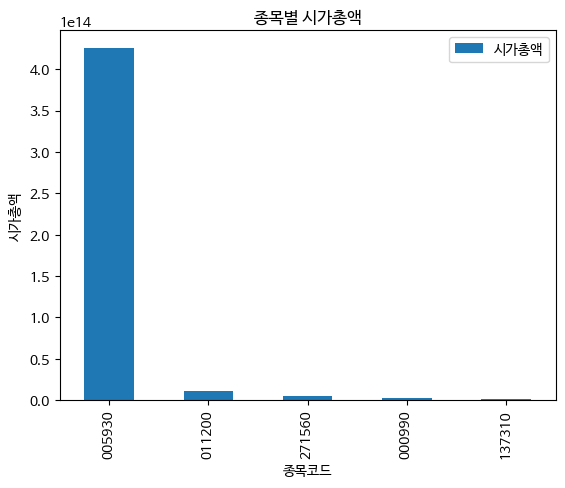

In [94]:
import matplotlib.pyplot as plt

df_market_cap.plot(kind='bar', x='종목코드', y='시가총액')

plt.title('종목별 시가총액')

plt.xlabel('종목코드')


plt.ylabel('시가총액')

plt.show()

In [ ]:
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1022 은행
1024 증권
1025 보험
1026 서비스업